In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7, 8.27)})

In [2]:
from model import TwoRegionModel

In [ ]:
groups = [
    {"delta": 0.35, "rho": 0.70, "T": 1.6 }, 
    {"delta": 0.35, "rho": 0.75, "T": 1.9 }, 
    {"delta": 0.35, "rho": 0.80, "T": 2.2 }, 
    {"delta": 0.40, "rho": 0.70, "T": 1.9 }, 
    {"delta": 0.40, "rho": 0.75, "T": 2.4 }, 
    {"delta": 0.40, "rho": 0.80, "T": 2.2 }, 
    {"delta": 0.45, "rho": 0.70, "T": 1.9 }, 
    {"delta": 0.45, "rho": 0.75, "T": 2.2 }, 
    {"delta": 0.45, "rho": 0.80, "T": 1.9 }, 
    {"delta": 0.45, "rho": 0.70, "T": 2. }
]

for g in groups:
    g["eps"] = 1 / (1-g["rho"])

#### Q1



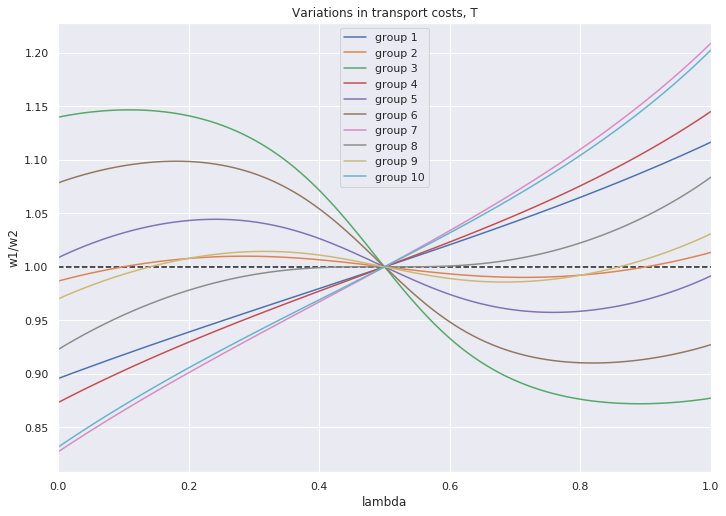

In [5]:
n = 100
lams = np.linspace(0, 1, n)

df = pd.DataFrame(index=lams, columns=[f"group {n+1}" for n in range(len(groups))])

for n, g in enumerate(groups):
    
    model = TwoRegionModel(delta=g["delta"], eps=g["eps"], verbose=0)
    
    wage_r = []

    for l in lams:

        _, _, _, wages = model.solve(l, g["T"])

        wage_r.append(wages[0] / wages[1])
        
    df[f"group {n+1}"] = wage_r    

df.plot()
plt.ylabel("w1/w2")
plt.xlabel("lambda")
plt.title("Variations in transport costs, T")
plt.hlines(1, xmin=0, xmax=1, linestyle="--")
plt.xlim(0, 1)
plt.show()

#### Q2

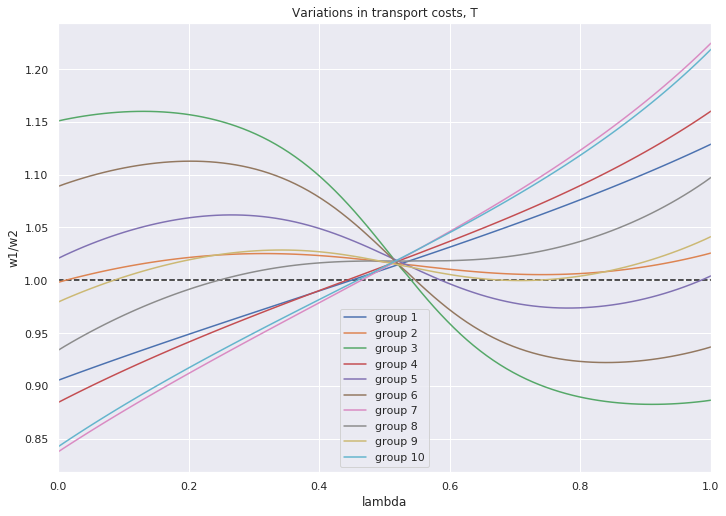

In [6]:
n = 100
lams = np.linspace(0, 1, n)

df = pd.DataFrame(index=lams, columns=[f"group {n+1}" for n in range(len(groups))])

for n, g in enumerate(groups):
    
    model = TwoRegionModel(delta=g["delta"], eps=g["eps"], phi=.525, verbose=0)
    
    wage_r = []

    for l in lams:

        _, _, _, wages = model.solve(l, g["T"])

        wage_r.append(wages[0] / wages[1])
        
    df[f"group {n+1}"] = wage_r    

df.plot()
plt.ylabel("w1/w2")
plt.xlabel("lambda")
plt.title("Variations in transport costs, T")
plt.hlines(1, xmin=0, xmax=1, linestyle="--")
plt.xlim(0, 1)
plt.show()